### Gruppe 3
 - Svetlana Marchenko Matrikel NR 20236284
 

Der Immobilienmarkt in Portugal ist hochgradig wettbewerbsintensiv und dynamisch, wobei die Preise aufgrund zahlreicher Faktoren erheblich variieren. Eine genaue Vorhersage von Immobilienpreisen kann Käufern, Verkäufern, Immobilienmaklern und Investoren helfen, fundierte Entscheidungen zu treffen. Das Ziel besteht darin, ein Modell zu entwickeln, das den Preis einer Immobilie basierend auf deren spezifischen Eigenschaften vorhersagen kann.

Ich arbeite mit Daten aus drei Quellen: `Aufgabe2_19052024.ipynb`, `webscrapingTest.ipynb` und `DataPreprocessing.ipynb`. Zusätzlich verwende ich `googleMaps.py` für geografische Informationen. Das Ziel dieses Projekts ist es, ein Modell zur Vorhersage der Wohnungspreise auf dem portugiesischen Immobilienmarkt zu erstellen, basierend auf den spezifischen Merkmalen der Immobilien.

Obwohl ich der Meinung bin, dass die Variable `Floor` eine Rolle bei der Bestimmung des Wohnungspreises spielen könnte, wird sie aufgrund unzureichender Datenwerte in dieser Analyse nicht berücksichtigt.

Die Daten von Immobilien auf den Inseln der Azoren und Madeira habe ich nach eingehender Überlegung ausgenommen. Der Immobilienmarkt dort ist äußerst spezifisch und orientiert sich eher an Ferienwohnungen, was sich deutlich von dem Markt für Wohnimmobilien unterscheidet.

Fragestellung: Wie können wir anhand von Merkmalen wie Standort, Größe, Ausstattung und anderen Faktoren den Preis von Immobilien in Portugal modellieren und vorhersagen?

 Die vorliegenden Daten umfassen Immobilieninformationen wie Standort, Preis, Anzahl der Zimmer, Flächenangaben sowie verschiedene Merkmale wie Parkmöglichkeiten und Aufzugverfügbarkeit.


In der arbeite Ich mit dem *Wohnungen* Datensatz. Dieser umfasst 1717 Beobachtungen zu den Verkaufspreisen von Wohnungen in Portugal (auser Inseln). Die Daten sind in der Datei `dataconcatPropertyAndAge2905-00.csv` abgelegt.
## Variablenbeschreibung

1. `Location:` Der Standort der Immobilie. Dies umfasst den Stadtteil und die Stadt bzw. Gemeinde.

2. `Price:` Der Verkaufspreis der Immobilie in Euro.

3. `Bedooms:` Die Anzahl der Schlaffzimmer in der Immobilie.

4. `WCs:` Die Anzahl der Badezimmer in der Immobilie.

5. `Net Floor Area (m2):` Die Netto-Wohnfläche der Immobilie in Quadratmetern. Dies bezieht sich auf die tatsächliche nutzbare Fläche innerhalb der Wände.

6. `Gross Private Area (m2):` Die Bruttowohnfläche der Immobilie in Quadratmetern. Dies umfasst die gesamte Fläche inklusive der Wände und anderen gemeinschaftlichen Bereichen.

7. `Parking:` Die Anzahl der verfügbaren Parkplätze zur Immobilie.

8. `Floor:` Die Etage, auf der sich die Immobilie befindet. Dieser Wert wird aufgrund unzureichender Datenwerte nicht in die Analyse einbezogen.

9. `Energy Performance Certificate:` Das Energieleistungszertifikat der Immobilie. Dies gibt die Energieeffizienz der Immobilie an.

10. `Elevator_Not available:` Ein Boolean-Wert (True/False), der angibt, ob ein Aufzug in der Immobilie nicht verfügbar ist.

11. `Capital:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in der Hauptstadt Lissabon befindet.

12. `Metropolitan Areas:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in einer Metropolregion befindet.

13. `Large cities:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in einer Großstadt befindet.

14. `Coastal Locations:` Ein Boolean-Wert (True/False), der angibt, ob sich die Immobilie in einer Küstenregion befindet.

15. `Median Age:` Das mittlere Alter der Bevölkerung in der Region, in der sich die Immobilie befindet.

16. `Distance To Ocean: ` Die Entfernung der Immobilie zum Meer in Kilometern.


In [440]:
# Laden der notwendigen Bibliotheken
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns   # https://seaborn.pydata.org

# Make sure the plots are displayed inline (within the notebook)
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import csv

FILENAME_DATASET ="dataconcatPropertyAndAge2905-23-48.csv"

In [238]:
#Datensatz wird kopiert und  kontroliert ob die Dimension des Datensatzes ist korrekt
df = pd.read_csv(FILENAME_DATASET,
                 sep=';',
                 encoding='ISO-8859-1',
                 header=0, 
                 )
df_Copy = df
nSpalten = df_Copy.shape[1]
nZeilen = df_Copy.shape[0]
if nSpalten == 16 and nZeilen == 1949:
    print(
       f"Der Datensatz hat  Zeilen {nZeilen} und {nSpalten} Spalten. Die Dimension des Datensatzes ist korrekt.")
else:
    print(f"Fehler: Der Datensatz hat nicht die erwartete Dimension  {nZeilen}  und {nSpalten}"  )


Der Datensatz hat  Zeilen 1717 und 16 Spalten. Die Dimension des Datensatzes ist korrekt.


Da die Anzahl die Zimmer bedeutet in Portugal Anzal der Schlaffzimmern es macht sin die Column 'Rooms' in column 'Bedrooms' umbenennen, die Wohnungen mit 0 'Bedrooms' sind 'Studio'

In [239]:
df_Copy = df_Copy.rename(columns={'Rooms': 'Bedrooms'})

In [241]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1717 non-null   object 
 1   Price                           1717 non-null   int64  
 2   Bedrooms                        1717 non-null   int64  
 3   WCs                             1717 non-null   int64  
 4   Net Floor Area (m2)             1602 non-null   float64
 5   Gross Private Area (m2)         1575 non-null   float64
 6   Parking                         1717 non-null   int64  
 7   Floor                           875 non-null    float64
 8   Energy Performance Certificate  1717 non-null   object 
 9   Elevator_Not available          1717 non-null   bool   
 10  Capital                         1717 non-null   bool   
 11  Metropolitan Areas              1717 non-null   bool   
 12  Large cities                    17

Die Werte der Variablen entsprechen den erwarteten Werten. Das Einlesen der Daten funktioniert anscheinend.

Die Variablen 'Gross Private Area' und 'Net Floor Area (m2)' sind wichtige Faktoren für den Preis von Wohnungen. Die Brutto-Privatfläche bezieht sich auf die Gesamtfläche der Wohnung, einschließlich aller privaten Bereiche wie Wohnzimmer, Schlafzimmer und Badezimmer. Die Netto-Grundfläche ist die effektive Wohnfläche, die von den Bewohnern genutzt werden kann und schließt möglicherweise gemeinschaftlich genutzte Bereiche wie Flure und Treppenhäuser aus. Beide Variablen spielen eine entscheidende Rolle bei der Bestimmung des Wohnungspreises, wobei größere Flächen in der Regel zu höheren Preisen führen, da sie mehr Raum und Wohnkomfort bieten.
Bei mir fehlen einige Values für die Variablen. 

In [242]:
#Filtern des DataFrames nach fehlenden Werten in 'Gross Private Area' oder 'Net Floor Area (m2)'
missing_values_subset = df_Copy[df_Copy['Gross Private Area (m2)'].isnull() | df_Copy['Net Floor Area (m2)'].isnull()]

# Display the filtered DataFrame
print(missing_values_subset)

                                               Location   Price  Bedrooms  \
21                  Fânzeres e São Pedro da Cova, Porto  220000         2   
22                  Fânzeres e São Pedro da Cova, Porto  220000         2   
34    Seixal, Arrentela e Aldeia de Paio Pires, Setúbal  199000         3   
36    Cedofeita, Santo Ildefonso, Sé, Miragaia, São ...  160000         0   
45                           Matosinhos Sul, Matosinhos  295000         1   
...                                                 ...     ...       ...   
1648                                Águas Santas, Porto  270000         2   
1663                                   Cavalinha, Olhão  250000         2   
1676                                      Beato, Lisboa  269000         3   
1692                                    Virtudes, Porto  990000         2   
1709                          Gafanha da Nazaré, Ílhavo   99000         1   

      WCs  Net Floor Area (m2)  Gross Private Area (m2)  Parking  Floor  \


#### Imputation 

Imputation Net Floor Area (m2)

Ich werde versuchen Korrelation zwichen 'Net Floor Area (m2)' und 'Rooms' finden und  fehlende Werte in 'Net Floor Area (m2)' zu füllen

In [244]:
correlation = df_Copy['Net Floor Area (m2)'].corr(df_Copy['Bedrooms'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.7542617046310335


Da die Wohnungen sind meisten nach typiche Standarten gebaut es macht Sin, dass die 'Net Floor Area (m2)' und 'Rooms' stark korrelieren. Ein Korrelationskoeffizient von 0.75 zwischen 'Rooms' und 'Net Floor Area (m2)' deutet auf eine starke positive lineare Korrelation zwischen diesen beiden Variablen hin. Dies bedeutet, dass größere Werte für 'Net Floor Area (m2)' tendenziell mit größeren Werten für 'Rooms' einhergehen, und umgekehrt. 

In [246]:
# Fehlende Werte in 'Net Floor Area (m2)' auffüllen
mean_net_area = df_Copy.groupby('Bedrooms')['Net Floor Area (m2)'].transform('mean')
#df_Copy['Net Floor Area (m2)'].fillna(mean_net_area, inplace=True)
df_Copy['Net Floor Area (m2)'] = df_Copy['Net Floor Area (m2)'].fillna(mean_net_area)
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1717 non-null   object 
 1   Price                           1717 non-null   int64  
 2   Bedrooms                        1717 non-null   int64  
 3   WCs                             1717 non-null   int64  
 4   Net Floor Area (m2)             1717 non-null   float64
 5   Gross Private Area (m2)         1575 non-null   float64
 6   Parking                         1717 non-null   int64  
 7   Floor                           875 non-null    float64
 8   Energy Performance Certificate  1717 non-null   object 
 9   Elevator_Not available          1717 non-null   bool   
 10  Capital                         1717 non-null   bool   
 11  Metropolitan Areas              1717 non-null   bool   
 12  Large cities                    17

Imputation Gross Private Area (m2)

Ich werde versuchen Korrelation zwichen 'Gross Private Area (m2)' und 'Net Floor Area (m2)' finden und  fehlende Werte in 'Gross Private Area (m2)' zu füllen

In [247]:
correlation = df_Copy['Net Floor Area (m2)'].corr(df_Copy['Gross Private Area (m2)'])
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.8147315960440462


Ein Korrelationskoeffizient von 0.81 zwischen 'Gross Private Area (m2)' und 'Net Floor Area (m2)' deutet auf eine starke positive lineare Korrelation zwischen diesen beiden Variablen hin. Dies bedeutet, dass größere Werte für 'Net Floor Area (m2)' tendenziell mit größeren Werten für 'Gross Private Area (m2)' einhergehen, und umgekehrt. In Wohnungen mit einer größeren Nutzfläche ist es also wahrscheinlicher, dass auch die Gesamtfläche größer ist, und umgekehrt.

Ich entscheide mich für die Berechnung des Mittelwerts, da die Berechnung stellt sicher, dass die ergänzten Werte repräsentativ für die Verteilung der "Brutto-Privatfläche (m2)" innerhalb jeder Gruppe sind, die durch die "Netto-Grundfläche (m2)" definiert wird. Dies trägt dazu bei, die Gesamtverteilung der Daten zu erhalten.Insgesamt ist die Verwendung des Mittelwerts zur Auffüllung fehlender Werte eine gängige Methode, die einen Ausgleich zwischen der Beibehaltung der Datenverteilung und der Einfachheit der Implementierung darstellt. 

In [248]:

# Fehlende Werte in 'Gross Private Area (m2)' auffüllen
mean_gross_private_area = df_Copy.groupby('Net Floor Area (m2)')['Gross Private Area (m2)'].transform('mean')
print(mean_gross_private_area)
#df_Copy['Gross Private Area (m2)'].fillna(mean_gross_private_area, inplace=True)
df_Copy['Gross Private Area (m2)'] = df_Copy['Gross Private Area (m2)'].fillna(mean_gross_private_area)


0       144.533333
1        77.384615
2       164.000000
3        97.333333
4        91.470588
           ...    
1712     66.777778
1713    104.133333
1714    109.142857
1715     87.714286
1716     80.950000
Name: Gross Private Area (m2), Length: 1717, dtype: float64


In [249]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1717 non-null   object 
 1   Price                           1717 non-null   int64  
 2   Bedrooms                        1717 non-null   int64  
 3   WCs                             1717 non-null   int64  
 4   Net Floor Area (m2)             1717 non-null   float64
 5   Gross Private Area (m2)         1602 non-null   float64
 6   Parking                         1717 non-null   int64  
 7   Floor                           875 non-null    float64
 8   Energy Performance Certificate  1717 non-null   object 
 9   Elevator_Not available          1717 non-null   bool   
 10  Capital                         1717 non-null   bool   
 11  Metropolitan Areas              1717 non-null   bool   
 12  Large cities                    17

In [250]:
#Filtern des DataFrames nach fehlenden Werten in 'Gross Private Area' oder 'Net Floor Area (m2)'
missing_values_subset = df_Copy[df_Copy['Gross Private Area (m2)'].isnull() | df_Copy['Net Floor Area (m2)'].isnull()]

# Display the filtered DataFrame
print(missing_values_subset)

                                               Location   Price  Bedrooms  \
21                  Fânzeres e São Pedro da Cova, Porto  220000         2   
22                  Fânzeres e São Pedro da Cova, Porto  220000         2   
34    Seixal, Arrentela e Aldeia de Paio Pires, Setúbal  199000         3   
36    Cedofeita, Santo Ildefonso, Sé, Miragaia, São ...  160000         0   
61                                    Corroios, Setúbal  198500         2   
...                                                 ...     ...       ...   
1551                             Alta de Lisboa, Lisboa  420000         1   
1556                                    Boavista, Porto  280000         1   
1579                            Penha de França, Lisboa  179000         2   
1637                                Águas Santas, Porto  279000         2   
1648                                Águas Santas, Porto  270000         2   

      WCs  Net Floor Area (m2)  Gross Private Area (m2)  Parking  Floor  \


Löschen der Datensätze, bei denen die Variable "Distance To Ocean" größer als 300 ist,da die Entfernung zum Ozean in kontinentalen Portugal nicht größer als 300 sein kann. Auserdemm die Variable wird bereinigt 

In [252]:
# Löschen der Datensätze, bei denen die Variable "Distance to Ocean" größer als 300 ist
df_Copy = df_Copy[df_Copy['Distance To Ocean'] <= 300]
df_Copy['Distance To Ocean'] = pd.to_numeric(df_Copy['Distance To Ocean'], errors='coerce')
df_Copy.dropna(subset=['Distance To Ocean'], how='all', inplace=True)
df_Copy.info()




<class 'pandas.core.frame.DataFrame'>
Index: 1691 entries, 0 to 1716
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        1691 non-null   object 
 1   Price                           1691 non-null   int64  
 2   Bedrooms                        1691 non-null   int64  
 3   WCs                             1691 non-null   int64  
 4   Net Floor Area (m2)             1691 non-null   float64
 5   Gross Private Area (m2)         1576 non-null   float64
 6   Parking                         1691 non-null   int64  
 7   Floor                           861 non-null    float64
 8   Energy Performance Certificate  1691 non-null   object 
 9   Elevator_Not available          1691 non-null   bool   
 10  Capital                         1691 non-null   bool   
 11  Metropolitan Areas              1691 non-null   bool   
 12  Large cities                    1691 no

### Deskriptive Statistik

Funktion wird verwendet, um aggregierte Statistiken über Spalten mit numerischen Values eines DataFrame zu berechnen. 

In [254]:
# Aggregation von price und stories
df_Copy.agg(
    {
        "Price": ["count", "mean", "median", "std", "min", "max"],
        "Distance To Ocean": ["count", "median", "mean", "std", "min", "max"],
        "Parking": ["count", "mean", "median", "std", "min", "max"],
        "Floor": ["count", "mean", "median", "std", "min", "max"],
        "Bedrooms": ["count", "mean", "median", "std", "min", "max"],
        "WCs": ["count", "mean", "median", "std", "min", "max"],
        "Net Floor Area (m2)": ["count", "mean", "median", "std", "min", "max"],
        "Gross Private Area (m2)": ["count", "mean", "median", "std", "min", "max"],
        "Median Age": ["count", "mean", "median", "std", "min", "max"],
    }
).round(2)

,Price,Distance To Ocean,Parking,Floor,Bedrooms,WCs,Net Floor Area (m2),Gross Private Area (m2),Median Age
count,1691.00,1691.00,1691.00,861.00,1691.00,1691.00,1691.00,1576.00,1691.00
mean,274732.95,25.58,0.68,2.17,2.28,1.68,92.01,108.35,46.48
median,240000.00,13.00,1.00,2.00,2.00,2.00,89.00,100.00,46.60
std,144744.02,27.99,0.77,1.86,0.94,0.70,33.80,49.08,1.86
min,10800.00,0.00,0.00,-1.00,0.00,1.00,25.00,9.00,42.60
max,990000.00,171.00,6.00,12.00,6.00,5.00,256.00,727.00,59.80


1) Schon nach der ersten Aggregation lässt sich erkennen, dass die meisten Immobilien sich nicht weit entfernt von der Küste befinden. Obwohl es einige Immobilienmärkte gibt, die sich weiter entfernt von der Küste befinden (maximal 171 km von der Küste entfernt), sind die meisten Städte eher in Küstennähe angesiedelt.

2) Obwohl es gibt die Wohnungen ohne Parking - mindestens Hälfte der Wohnungen 1 oder noch mehere Parkings besitzen

3) Die Höheste Etage im Angebot ist 12, was kann bedeuten, dass es kaum oder ganz wenig Gebäuden in Portugal gibt, die höhe als 12 Etagen sind

4) Obwohl die kleinste Wohnung im Angebot eine Fläche von 25 Quadratmetern hat, sind die Wohnungen tendenziell groß genug. 

quantile(0.1) berechnet das 10. Perzentil der Werte in der "Price"-Spalte. Das bedeutet, dass 10% der Preise in df_Copy niedriger oder gleich dem Wert von Price_q10 sind.
quantile(0.9) berechnet das 90. Perzentil der Werte in der "Price"-Spalte. Das bedeutet, dass 90% der Preise in df_Copy niedriger oder gleich dem Wert von Price_q90 sind.

In [255]:
Price_q10 = df_Copy.Price.quantile(0.1)
Price_q90 = df_Copy.Price.quantile(0.9)

# Create a dataframe with the statistics
statistics_Price = pd.DataFrame(data={"Price": [Price_q10, Price_q90]},
                                 index=["q10", "q90"]).round(2)
statistics_Price.head()

,Price
q10,145500.0
q90,455000.0


10% der Wohnungen kosten weniger 145500 Euro und nur 10 % kosten mehr als 455000 Euro


#### Hypothese mit einer Gruppierungsvariable

1) Der mittlere Wohnungspreis ist höher für die Wohnungen in Hauptstadt Gegenden als  in nicht Hauptstadt Gegenden.

2) Der Wohnungspreis senkt mit der Entfernung von Ozean.

In [256]:
# Prüfe Hypothese 1: "Die Wohnungen in der Haupstadt sind teure"
df.groupby("Capital")["Price"].agg(["mean", "median", "std"]).round(2)

,mean,median,std
Capital,,,
False,254127.51,225000.0,122006.16
True,388405.74,349250.0,198672.32


Die Analyse der durchschnittlichen Preise von Wohnungen in Hauptstädten im Vergleich zu anderen Gebieten zeigt, dass Wohnungen in Hauptstädten tendenziell teurer sind. Im Durchschnitt liegt der Preis für Wohnungen in Hauptstädten bei 388,405.74 Einheiten, während er außerhalb der Hauptstädte bei 254,127.51 Einheiten liegt. Ebenso ist die Streuung der Preise innerhalb der Hauptstädte mit einem Standardabweichungswert von 198,672.32 höher im Vergleich zu Gebieten außerhalb der Hauptstädte (Standardabweichung: 122,006.16)

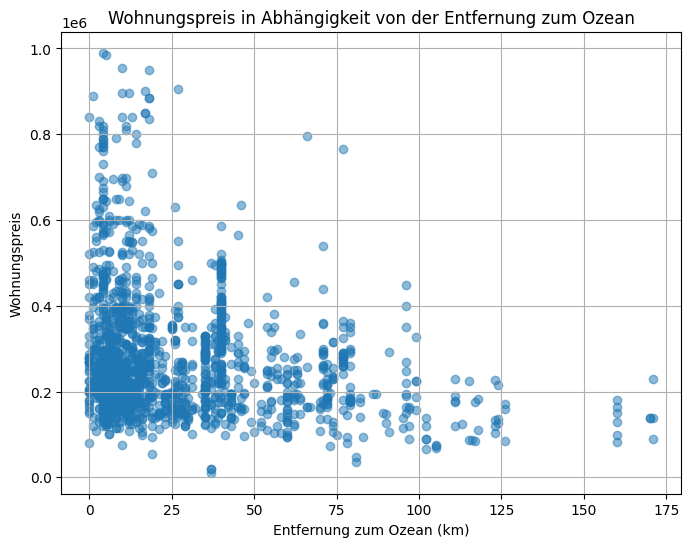

In [257]:
# Prüfe Hypothese 2: "Der Wohnungspreis senkt mit der Entfernung von Ozean."

# Streudiagramm erstellen
plt.figure(figsize=(8, 6))
plt.scatter(df_Copy['Distance To Ocean'], df_Copy['Price'], alpha=0.5)
plt.title('Wohnungspreis in Abhängigkeit von der Entfernung zum Ozean')
plt.xlabel('Entfernung zum Ozean (km)')
plt.ylabel('Wohnungspreis')
plt.grid(True)
plt.show()


Aus dem Diagramm geht hervor, dass sich die meisten Wohnungen im Bereich von 25 km vom Ozean befinden. Die teuersten Wohnungen befinden sich ausschließlich innerhalb dieses 25-km-Radius vom Ozean. Ab einem Abstand von 50 km gibt es, mit Ausnahme von zwei Fällen, keine teuren Wohnungen mehr. Der Immobilienmarkt jenseits von 75 km Entfernung vom Ozean ist sehr schwach ausgeprägt und weist eine geringere Wertdichte auf.

In [258]:
# Definiere die Distanzen in km 
bins = [0, 3, 5, 10, 25, float('inf')]
labels = ['Küstenlage', 'Nahe Küste', 'In Reichweite mit dem Fahrrad', 'Mit dem Auto erreichbar', 'Mehr als 25 km von der Küste entfernt']

# Füge eine neue Spalte mit den Distanzen hinzu
df_Copy['Distance_Group'] = pd.cut(df_Copy['Distance To Ocean'], bins=bins, labels=labels, right=False)

# Zeige den DataFrame mit der neuen Spalte an
df_Copy.head()


,Location,Price,Bedrooms,WCs,Net Floor Area (m2),Gross Private Area (m2),Parking,Floor,Energy Performance Certificate,Elevator_Not available,Capital,Metropolitan Areas,Large cities,Coastal Locations,Median Age,Distance To Ocean,Distance_Group
0,"Rio Tinto - Medancelhe, Gondomar",220000,4,2,126.0,161.0,1,0.0,Not available,True,False,True,False,False,47.1,9.0,In Reichweite mit dem Fahrrad
1,"Arroios, Lisboa",365000,2,1,67.0,67.0,0,NaN,Not available,True,True,True,True,False,44.8,12.0,Mit dem Auto erreichbar
2,"Fafe, Braga",220000,4,3,180.0,164.0,0,NaN,Not available,True,False,False,True,False,44.4,50.0,Mehr als 25 km von der Küste entfernt
3,"Bonfim, Porto",230000,3,2,87.0,87.0,0,NaN,Not available,True,False,True,True,True,47.0,6.0,In Reichweite mit dem Fahrrad
4,"Benfica, Lisboa",460000,3,2,81.0,104.0,1,9.0,Energy Performance Certificate,False,True,True,True,False,44.8,9.0,In Reichweite mit dem Fahrrad


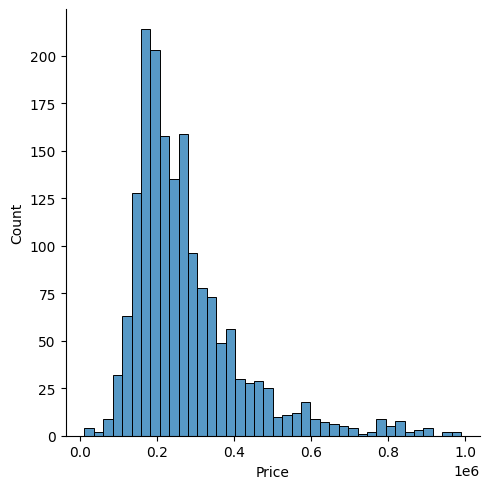

In [307]:
sns.displot(df_Copy['Price'])

Die y-Achse repräsentiert  von 0 bis 200 die Häufigkeit des Auftretens von Werten innerhalb der festgelegten Bins des Daten. Die 'Preis'-Werte normalisiert wurden, so dass **1 dem höchsten beobachteten Preis** im Datensatz entspricht, in diesem Fall sind die 'Preis'-Werte proportional zu ihrer Beziehung zum höchsten Preis skaliert. In dem Histogramm sehe ich, dass die höchste Anzahl von Beobachtungen bei einem Preis von 0,2 liegt, mit einem Zählerwert von mehr als 200.  

<Axes: xlabel='Entfernung vom Ozean', ylabel='Anzahl der Wohnungen'>

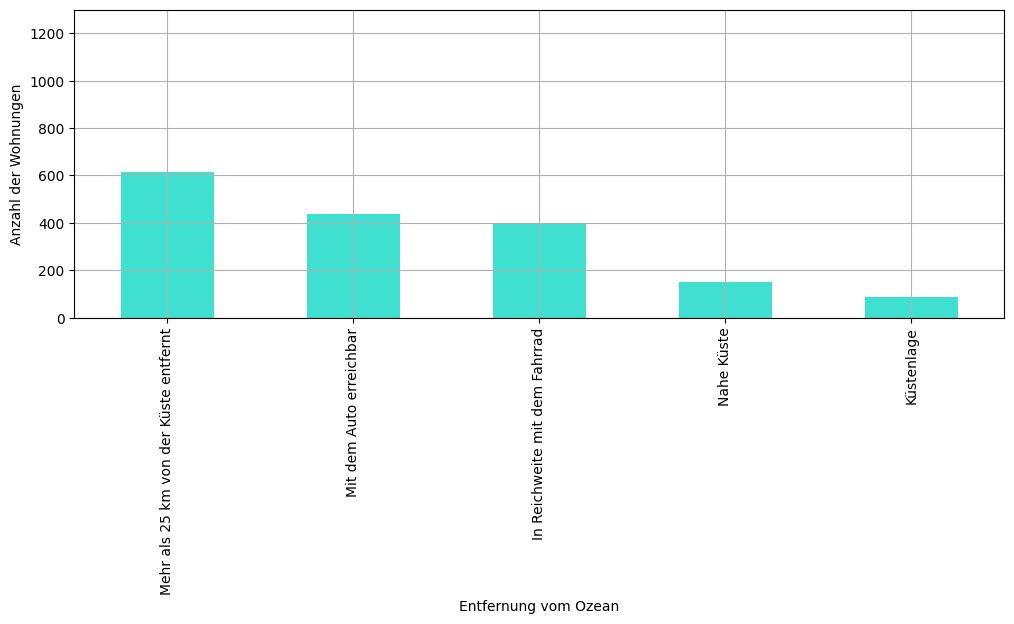

In [259]:
# Zeigen die statistiken nach Distanze für alle Wohnungen 
FIGSIZE = (12, 4)
YLABEL = "Anzahl der Wohnungen"
XLABEL = "Entfernung vom Ozean"
GRID = True


df_Copy["Distance_Group"].value_counts().plot.bar(
    figsize=FIGSIZE, ylabel=YLABEL, xlabel=XLABEL, ylim=(0, 1300), grid=GRID, color='turquoise')

Das Diagramm verdeutlicht, dass der Großteil der angebotenen Wohnungen sich in einem Bereich von 5 bis 25 km Entfernung befindet.

C:\Users\sve75036\AppData\Local\Temp\ipykernel_20728\1220372391.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distanz_capital_anzahl = filtered_df.groupby(['Distance_Group', 'Capital']).size().unstack(fill_value=0)


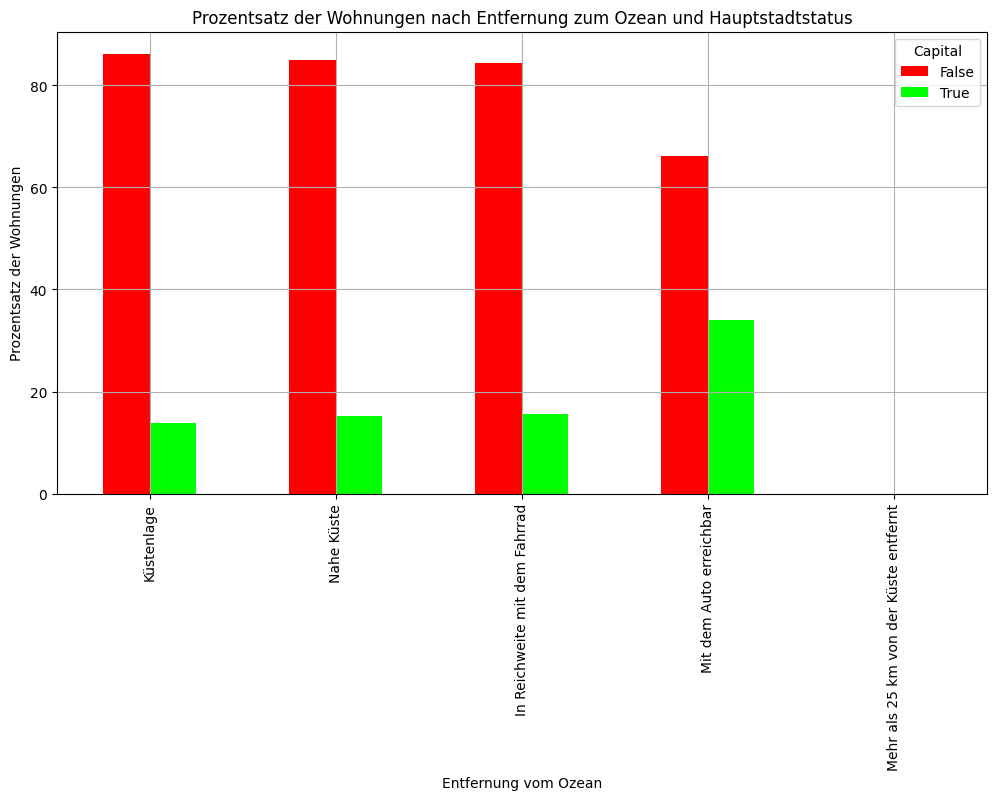

In [260]:


# Definiere Konstanten
FIGSIZE = (12, 6)
YLABEL = "Prozentsatz der Wohnungen"
XLABEL = "Entfernung vom Ozean"
GRID = True

# Definiere Farben für Capital und Not-capital
colors = {'Non-Capital': 'red', 'Capital': 'lime'}


# Filter the data to include only the desired Distance Groups
filtered_df = df_Copy[df_Copy['Distance_Group'].isin(['Küstenlage', 'Nahe Küste', 'In Reichweite mit dem Fahrrad', 'Mit dem Auto erreichbar'])]
# Gruppiere die Daten nach 'Distanzgruppe' und 'Capital' und zähle die Anzahl der Wohnungen in jeder Gruppe
distanz_capital_anzahl = filtered_df.groupby(['Distance_Group', 'Capital']).size().unstack(fill_value=0)

# Normalisiere die Zählungen, um den Prozentsatz zu erhalten
distanz_capital_prozentsatz = distanz_capital_anzahl.div(distanz_capital_anzahl.sum(axis=1), axis=0) * 100

# Plotte das nebeneinander gestapelte Balkendiagramm
ax = distanz_capital_prozentsatz.plot(kind='bar', figsize=FIGSIZE, color=colors.values(), ylabel=YLABEL, xlabel=XLABEL, grid=GRID)

# Setze den Titel und das Legende
ax.set_title("Prozentsatz der Wohnungen nach Entfernung zum Ozean und Hauptstadtstatus")

# Zeige das Diagramm
plt.show()


Das Diagramm zeigt den prozentualen Anteil der Wohnungen nach ihrer Entfernung zum Ozean und ihrem Hauptstadtstatus. Die x-Achse repräsentiert die verschiedenen Entfernungsgruppen zum Ozean, während die y-Achse den prozentualen Anteil der Wohnungen darstellt. Die Balken sind jeweils in zwei Abschnitte unterteilt: einen für Wohnungen außerhalb der Hauptstadt (rot) und einen für Wohnungen in der Hauptstadt (limette). Hauptstadt vs. Nicht-Hauptstadt: In jeder Entfernungsgruppe gibt es deutliche Unterschiede in der Verteilung der Wohnungen zwischen der Hauptstadt und den nicht-hauptstädtischen Gebieten. In den meisten Entfernungsgruppen übersteigt die Anzahl der angebotenen Wohnungen in den nicht-hauptstädtischen Gebieten die in der Hauptstadt. Das Angebot an Wohnungen in der Hauptstadt für Wohnungen mit einem Abstand zum Ozean zwischen 10 und 25 km ist im Vergleich zu anderen Gruppen (0 km Distanz, 3 bis 5 km, 5 bis 10 km) doppelt so hoch. Es macht app. 35 % aller angebotenen Wohnungen aus, die sich 10-25 km vom Ozean entfernt befinden.

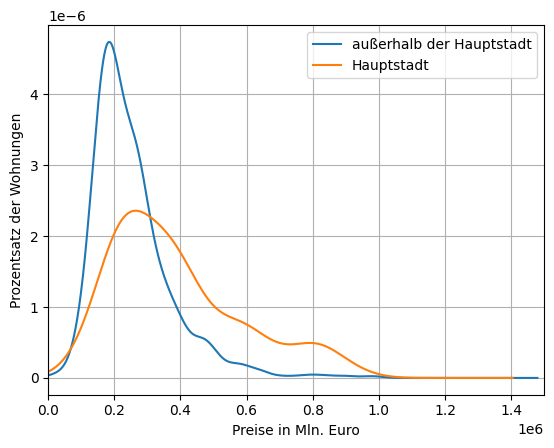

In [266]:
# Kerndichte-Plot je Ausprägung der Variable `Capital`

YLABEL = "Prozentsatz der Wohnungen"
XLABEL = "Preise in Mln. Euro"
df.groupby("Capital")["Price"].plot.density(
    alpha=1.0, legend=True, grid=True, xlim=(0, 1500000),  xlabel=XLABEL)
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)
plt.legend(labels=['außerhalb der Hauptstadt', 'Hauptstadt'])


plt.show()

Der Plot zeigt, dass die Preise für die Wohnungen in der hauptstadt stärker variieren als für die Wohnungen außerhalb der Hauptstadt

Hypothese 3: "Die Wohnungen mit mehr als 3 Schlaffzimmer sind selten auf dem Markt"

Hypothese 4: "Der Wohnungspreis steigt mit der Anzahl der Zimmer"

Text(0.5, 1.0, 'Verteilung der Wohnungen nach Anzahl der Schlafzimmer')

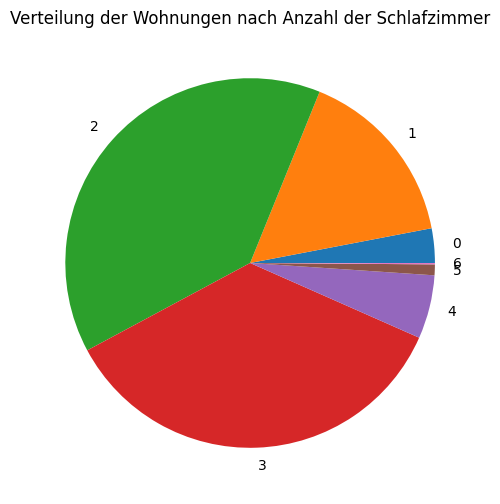

In [277]:
onMarket = df_Copy.groupby(['Bedrooms'], observed=True ).size()
onMarketPlot = onMarket.plot.pie( figsize=(6, 6))
onMarketPlot.set_title('Verteilung der Wohnungen nach Anzahl der Schlafzimmer')

Es ist offensichtlich, dass die meisten vertretenen Wohnungen zwei Schlafzimmer haben, gefolgt von Wohnungen mit drei Schlafzimmern und dann Wohnungen mit einem Schlafzimmer. Vier-Schlafzimmer-Wohnungen sowie Studios sind im Vergleich dazu selten auf dem Markt zu finden. Fünf- oder Sechs-Zimmer-Wohnungen sind generell sehr wenig vertreten.

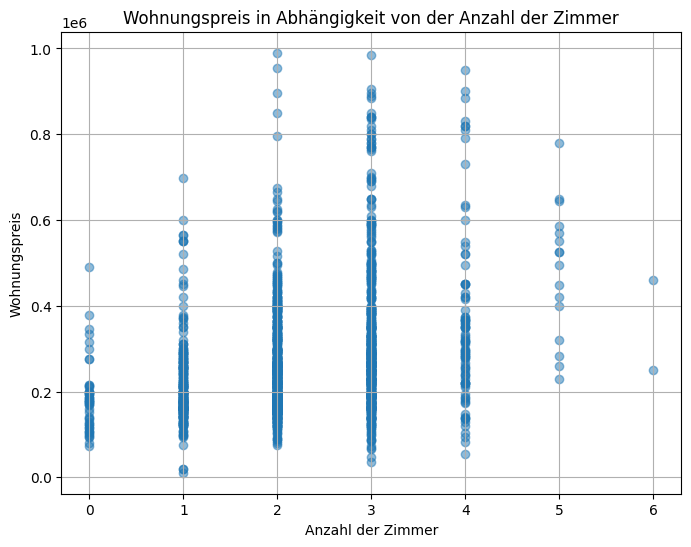

In [278]:
# Prüfe Hypothese 4: "Der Wohnungspreis steigt mit der Anzahl der Zimmer"

# Streudiagramm erstellen
plt.figure(figsize=(8, 6))
plt.scatter(df_Copy['Bedrooms'], df_Copy['Price'], alpha=0.5)
plt.title('Wohnungspreis in Abhängigkeit von der Anzahl der Zimmer')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Wohnungspreis')
plt.grid(True)
plt.show()


Der Wohnungspreis steigt mit der Anzahl der Zimmer - stimmt nur teilweise, da die teurste Wohnungen gehören zu Wohnungen mit 2 oder 3 Schlafzimmer. Aber wenn man median Preise anschaut, seht man dass die Preis steigt abhängig von Zimmeranzahl

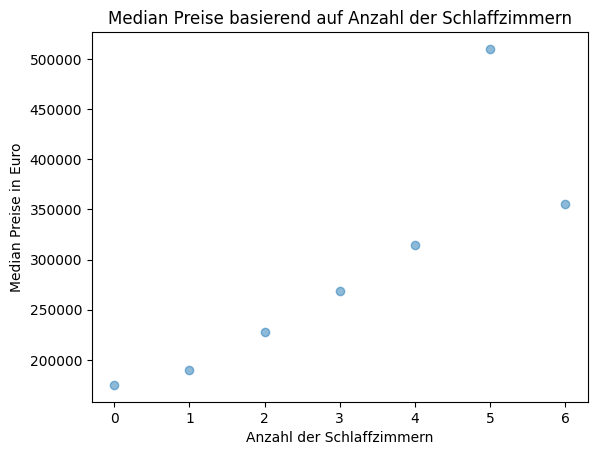

In [283]:

# Berechnen des Medianpreises für jede Anzahl von Zimmern
median_price_per_room = df_Copy.groupby('Bedrooms')['Price'].median()

# Streudiagramm mit den Zimmern auf der x-Achse und dem Medianpreis auf der y-Achse erstellen
plt.scatter(median_price_per_room.index, median_price_per_room.values, alpha=0.5)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Median Preise basierend auf Anzahl der Schlaffzimmern')
plt.xlabel('Anzahl der Schlaffzimmern')
plt.ylabel('Median Preise in Euro')

# Anzeigen des Plots
plt.show()


Ich kann die Variablen 'Floor' und 'Gross Private Area (m2)' nicht verwenden, weil mir viele Daten in diesen Spalten fehlen. Dafür aber kann ich ansehen ob Älter der Bewohner mit dem Preise an der Wohnung korreliert

In [287]:
correlation = df_Copy['Price'].corr(df_Copy['Median Age'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.23042178030651866


Der Korrelationskoeffizient zwischen dem Preis und dem Medianalter beträgt -0,2304. Dieser negative Wert deutet darauf hin, dass es eine schwache negative Korrelation zwischen diesen beiden Variablen gibt. Es bedeutet, dass tendenziell höhere Preise mit einem niedrigeren Medianalter und umgekehrt verbunden sind, obwohl die Korrelation nicht sehr stark ist.

Ich vergleiche jetzt die Median Preise in die Grosse Städte. 

C:\Users\sve75036\AppData\Local\Temp\ipykernel_20728\2510099627.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  verkaufspreise_mean = filtered_df.groupby(['Bedrooms', 'Distance_Group'])['Price'].median()


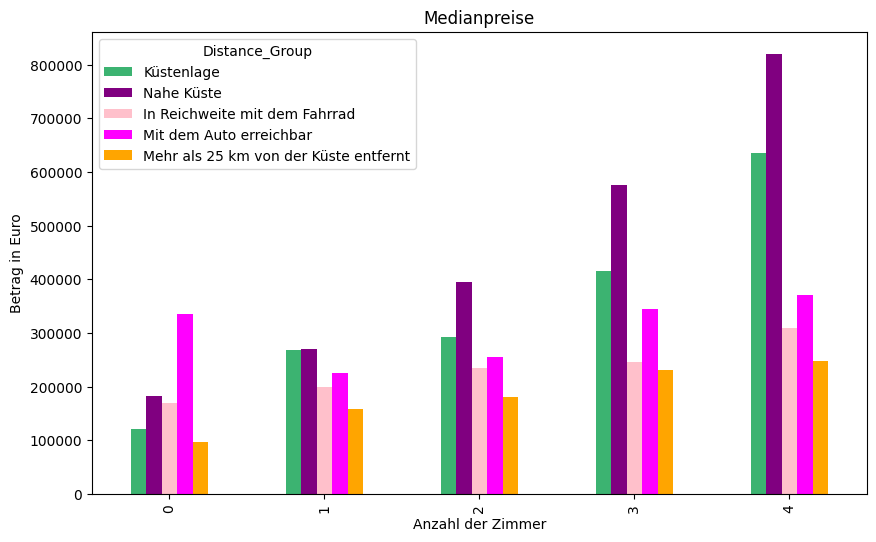

In [304]:
YLABEL = "Betrag in Euro"
XLABEL = "Anzahl der Zimmer"
TITLE = "Medianpreise"

# Farben für jede Kategorie definieren
colors = {'Küstenlage': 'mediumseagreen', 'Nahe Küste': 'purple', 'In Reichweite mit dem Fahrrad': 'pink', 'Mit dem Auto erreichbar': 'magenta', 'Mehr als 25 km von der Küste entfernt':'orange'}

# Filtern der Daten für Wohnungen mit 0 bis 4 Schlafzimmern und in großen Städten
filtered_df = df_Copy[(df_Copy['Large cities'] == True) & (df_Copy['Bedrooms'].isin([0, 1, 2, 3, 4]))]

# Gruppieren und Durchschnittspreise berechnen
verkaufspreise_mean = filtered_df.groupby(['Bedrooms', 'Distance_Group'])['Price'].median()

# Balkendiagramm erstellen
purchasePlot = verkaufspreise_mean.unstack().plot(kind ='bar', figsize=(10, 6), title=TITLE, xlabel=XLABEL, ylabel=YLABEL, color=[colors[str(category)] for category in verkaufspreise_mean.unstack().columns])
purchasePlot.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()


Entfernung von 10 bis 25 km vom Ozean sind. Dies könnte darauf hinweisen, dass in diesen Bereichen neue und moderne Wohnungen gebaut wurden, die besonders für Singles attraktiv sind. Auffällig ist, dass die Medianpreise von Studios zu Ein- und Zwei-Schlafzimmer-Wohnungen sinken und dann bei einer höheren Anzahl an Schlafzimmern nicht drastisch steigen. Die Preise für Studios und Drei- bis Vier-Schlafzimmer-Wohnungen sind nahezu gleich.

Die niedrigsten Medianpreise für Studios findet man in großer Entfernung vom Ozean (mehr als 25 km). In diesen Bereichen steigen die Medianpreise für Ein-Schlafzimmer-Wohnungen um mehr als 50 %, bleiben aber fast unverändert für Zwei-Schlafzimmer-Wohnungen. Bei Drei- und Vier-Schlafzimmer-Wohnungen sind die Preise höher.

Medianpreise Steigerung  ist am Wenigsten abhängig von Anzahl der Zimmer im Bereich von 5 bis 10 km von Ozean. 

Der Plot zeigt, dass sich die Medianpreise für Wohnungen in Küstenlage und Nahe Küste von Studios bis zu Vier-Schlafzimmer-Wohnungen vervierfachen (oder mehr für 4-Schlafzimmer-Wohnungen ). Dies deutet darauf hin, dass größere Wohnungen in Küstennähe deutlich teurer sind als Studios. Die Nachfrage nach größeren Wohnflächen in attraktiven Küstengebieten könnte ein wesentlicher Faktor für diese Preissteigerung sein.






# Linear Regression Case Study 'Portugal Immobilen Market (ohne Inseln)'

Eine Entscheidung für eine lineare Regression:

1. **Einfache Interpretation**: Lineare Regression liefert eine leicht verständliche Beziehung zwischen den unabhängigen Variablen (z.B. Anzahl der Schlafzimmer, Entfernung zum Ozean) und der abhängigen Variable (z.B. Medianpreis).

2. **Effizienz**: Lineare Regression ist relativ einfach und schnell zu berechnen, was besonders bei großen Datensätzen von Vorteil ist.

3. **Hinreichende Genauigkeit**: Wenn die Beziehung zwischen den Variablen annähernd linear ist, kann die lineare Regression gute Vorhersagen liefern. Wie schon oben gezeigt, verdeutlicht der Plot, dass sich die Medianpreise in einer nachvollziehbaren Weise ändern, was auf eine zumindest teilweise lineare Beziehung hinweist.

4. **Gute Grundlage**: Selbst wenn die Beziehung nicht perfekt linear ist, kann die lineare Regression als Ausgangspunkt dienen. Man kann später komplexere Modelle in Betracht ziehen, falls erforderlich.

5. **Verfügbarkeit und Implementierung**: Lineare Regression ist in den meisten statistischen und maschinellen Lernprogrammen weit verbreitet und einfach zu implementieren.





Erst alle boolians werte nach integer umwandeln

In [316]:
# Die binäre Variable 'Binary_Variable' hat Werte wie 'False' und 'True'
# Die binäre Variable  in 0 und 1 umwandeln, wobei 'False' zu 0 und 'True' zu 1 wird
df_Copy[['Capital', 'Elevator_Not available', 'Metropolitan Areas', 'Large cities', 'Coastal Locations']] = df_Copy[['Capital', 'Elevator_Not available', 'Metropolitan Areas', 'Large cities', 'Coastal Locations']].astype(int)
df_Copy.head()


,Location,Price,Bedrooms,WCs,Net Floor Area (m2),Gross Private Area (m2),Parking,Floor,Energy Performance Certificate,Elevator_Not available,Capital,Metropolitan Areas,Large cities,Coastal Locations,Median Age,Distance To Ocean,Distance_Group
0,"Rio Tinto - Medancelhe, Gondomar",220000,4,2,126.0,161.0,1,0.0,Not available,1,0,1,0,0,47.1,9.0,In Reichweite mit dem Fahrrad
1,"Arroios, Lisboa",365000,2,1,67.0,67.0,0,NaN,Not available,1,1,1,1,0,44.8,12.0,Mit dem Auto erreichbar
2,"Fafe, Braga",220000,4,3,180.0,164.0,0,NaN,Not available,1,0,0,1,0,44.4,50.0,Mehr als 25 km von der Küste entfernt
3,"Bonfim, Porto",230000,3,2,87.0,87.0,0,NaN,Not available,1,0,1,1,1,47.0,6.0,In Reichweite mit dem Fahrrad
4,"Benfica, Lisboa",460000,3,2,81.0,104.0,1,9.0,Energy Performance Certificate,0,1,1,1,0,44.8,9.0,In Reichweite mit dem Fahrrad


In [336]:

# Erstelle eine neue Spalte "Elevator_Available", die das Gegenteil von "Elevator_Not_Available" ist
df_Copy['Elevator_Available'] = 1 - df_Copy['Elevator_Not available']


## Training eines linearen Regressionsmodells

Lassen Sie uns nun damit beginnen, unser Regressionsmodell zu trainieren! Zuerst müssen wir unsere Daten in ein X-Array aufteilen, das die Features zum Trainieren enthält, und ein y-Array mit der Zielvariablen, in diesem Fall die Spalte Preis. Wir werden die Spalte Adresse verwerfen, da sie nur Textinformationen enthält, die das lineare Regressionsmodell nicht verwenden kann.

### X- und y-Arrays

Ausgang Variablen

In [423]:
X = df_Copy[['Bedrooms','Parking', 'Large cities', 'Distance To Ocean']]
y = df_Copy['Price']

## Aufteilung in Trainings- und Testdatensatz

Lassen Sie uns jetzt die Daten in einen Trainingsdatensatz und einen Testdatensatz aufteilen. Wir werden unser Modell auf dem Trainingsdatensatz trainieren und dann den Testdatensatz verwenden, um das Modell zu evaluieren.

In [424]:
from sklearn.model_selection import train_test_split

#### Verwendung von Out-of-Sample-Daten -  um sicherzustellen, dass ein Modell robust und zuverlässig ist und in der Lage ist, auf neuen Daten gute Vorhersagen zu machen.


 Aufteilen des Datensatzes in Trainings- und Testdaten, wobei 30% der Daten für den Test verwendet werden
 random_state=101 stellt sicher, dass die Aufteilung bei jedem Durchlauf reproduzierbar ist

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Erstellung und Training des Modells

In [426]:
from sklearn.linear_model import LinearRegression

In [427]:
lm = LinearRegression()

In [428]:
rg = lm.fit(X_train,y_train)


## Modellbewertung

Lassen Sie uns das Modell bewerten, indem wir seine Koeffizienten überprüfen und wie wir sie interpretieren können.



In [429]:
# print the intercept
print(lm.intercept_)

155616.37757070485


Der y-Achsenabschnitt dient als Referenzpunkt für die Berechnung der Preise unter verschiedenen Bedingungen, basierend auf den Werten der unabhängigen Variablen. In diesem speziellen Fall bedeutet ein y-Achsenabschnitt von 45717.276326016465, dass der geschätzte Preis einer Immobilie etwa 45717.27 beträgt, wenn alle anderen Einflussfaktoren (wie z. B. Einkommen, Anzahl der Parking, Anzahl der Zimmer usw.) den Wert Null haben.

In [430]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Bedrooms,45068.675992
Parking,38885.917542
Large cities,36560.853151
Distance To Ocean,-1102.451674


Basierend auf den  Koeffizientenwerten ergibt sich die folgende Interpretation:

    Bedrooms: Eine zusätzliche Schlafzimmereinheit führt zu einem durchschnittlichen Anstieg des Preises um etwa 45068.68 Einheiten.

    Parking: Ein zusätzlicher Parkplatz führt zu einem durchschnittlichen Anstieg des Preises um etwa 38885.92 Einheiten.

    Large cities: Das Vorhandensein einer Großstadt führt zu einem durchschnittlichen Anstieg des Preises um etwa 36560.85 Einheiten.

    Distance To Ocean: Eine Einheitserhöhung der Entfernung zum Ozean führt zu einem durchschnittlichen Rückgang des Preises um etwa 1102.45 Einheiten.

## Vorhersagen aus unserem Modell

Lassen Sie uns Vorhersagen aus unserem Testdatensatz erstellen und sehen, wie gut unser Modell abschneidet!

In [432]:
predictions = lm.predict(X_test)

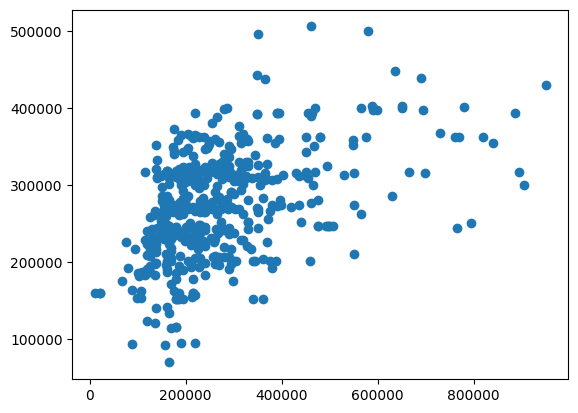

In [433]:
plt.scatter(y_test,predictions)

## Regression Evaluation Metrics

Here we list again metrics used for evaluating regression models (the less, the better):

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [434]:
from sklearn import metrics